In [1]:
from scipy.io import loadmat

# 加载 .mat 文件
data = loadmat('OHTDataset.mat')

# 查看文件中有哪些变量
print(data.keys())


dict_keys(['__header__', '__version__', '__globals__', 'x', 'xt', 'y', 'yt'])


In [2]:
X_train = data['x']
Y_train = data['y']
X_test = data['xt']
Y_test = data['yt']

use_subsample = False
if use_subsample:
    import numpy as np

    # 假设 X_test, Y_test 都是 numpy 数组
    n_test = X_test.shape[0]
    n_sub  = n_test // 4           # 向下取整得到 1/4 的样本数

    # 随机不放回抽取 n_sub 个索引
    idx = np.random.choice(n_test, size=n_sub, replace=False)

    # 取出子集
    X_test = X_test[idx]
    Y_test = Y_test[idx]


import torch
x_train = torch.tensor(X_train, dtype=torch.float32)
x_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(Y_train, dtype=torch.float32).squeeze(-1)
y_test = torch.tensor(Y_test, dtype=torch.float32).squeeze(-1)

In [3]:
x_train.shape, x_test.shape

(torch.Size([130, 4]), torch.Size([517, 4]))

In [5]:
type(X)
type(Y)
X.shape
# Y.shape


(8429, 4)

In [6]:
print(type(X))


<class 'numpy.ndarray'>


In [4]:
import numpy as np
import torch
from sklearn.model_selection import train_test_split

# 假设 x 和 y 是 numpy arrays，维度分别为 (8429, 4) 和 (8429, 1)
# 例子：
# x = np.random.rand(8429, 4)
# y = np.random.rand(8429, 1)

# 1. 转换为 torch.Tensor
x_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(Y, dtype=torch.float32).squeeze(-1)

# 2. 使用 sklearn 分割数据
# 先分出 test 集（15%）
x_temp, x_test, y_temp, y_test = train_test_split(x_tensor, y_tensor, test_size=0.15, random_state=42)

# 再从剩下的 85% 中分出 val（15% of total，即 val 是 15%，train 是 70%）
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.1765, random_state=42)
# 0.1765 ≈ 15 / 85，为了使验证集是整体的 15%

# 检查大小
print("Train:", x_train.shape, y_train.shape)
print("Val:  ", x_val.shape, y_val.shape)
print("Test: ", x_test.shape, y_test.shape)


Train: torch.Size([5899, 4]) torch.Size([5899])
Val:   torch.Size([1265, 4]) torch.Size([1265])
Test:  torch.Size([1265, 4]) torch.Size([1265])


In [34]:
import torch

# 假设 x_tensor.shape = (8429, 4), y_tensor.shape = (8429, 1)

# 总样本数
n_samples = x_tensor.shape[0]

# 随机打乱索引
indices = torch.randperm(n_samples)

# 选出前 130 条作为训练，接着 130 条作为测试
train_idx = indices[:1300]
test_idx = indices[1300:1400]

# 抽样
x_train = x_tensor[train_idx]
y_train = y_tensor[train_idx]

x_test = x_tensor[test_idx]
y_test = y_tensor[test_idx]

# 检查大小
print("x_train:", x_train.shape)
print("x_test: ", x_test.shape)


x_train: torch.Size([1300, 4])
x_test:  torch.Size([100, 4])


In [19]:
y_test

tensor([107.5856, -16.5657, -17.5001,  -7.3963, -15.1272,  -7.7891,  -9.5079,
         -6.9160, -14.2377,  -8.2937, -17.0222, -14.6513, -12.7637,  -4.0335,
          2.1772,  57.7837,  -6.9840,  39.4735,  -1.0438, -17.4361,  -1.9445,
         -4.1028, -17.3725, -17.3775,  -0.1986,  45.6261,  -4.6447,  -8.0551,
         -4.5774,  -7.0008,   4.7403, -12.7243,  -6.5046,  43.9415,  33.2987,
        -17.6890, -17.3858, -15.9047, -17.4303,   6.5453, -16.2187,  -3.6359,
         -7.8839, -15.6139, -16.2589,  -1.6400,  -6.7909,  -4.8102,  -1.4041,
        -11.4467,  -2.9109, -17.3043,  -1.9388,  -9.4244,  -2.8949, -17.4419,
        -15.2015,  -6.3763,  -5.5120, -17.4019,  -5.7606, -17.7048,  -2.9743,
        -16.0246,  -8.7441, -15.8115, -10.0705,  -7.9056,  78.2525, -16.6521,
        -13.7567,  53.8952,   0.1203, -15.5549, -16.3319, -16.9235,  81.5862,
         -2.3543, -11.8882, -17.3352, -17.3974, -17.6391,  12.9398, -17.7225,
        -15.0543, -14.6821, -15.7647,  -2.5926, -17.0418,  42.21

In [5]:
from JumpGP_test import *

M = 20
neighborhoods = find_neighborhoods(x_test, x_train, y_train, M)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
result = evaluate_jumpgp(x_test, y_test, neighborhoods, device)
result

100%|██████████| 517/517 [00:56<00:00,  9.21it/s]


[tensor(13.3569), tensor(4.3441), 56.119898557662964]

In [32]:
from DeepGP_test import *

from argparse import Namespace

args = Namespace(
    epochs=100,           # 训练轮数
    num_epochs=300,
    batch_size=1024,
    hidden_dim=2,
    lr=0.01,
    print_freq=10,        # 每多少个 epoch 打印一次信息
    # save_path="./model",  # 模型保存路径（可选）
    eval=True,            # 是否评估模型性能
    patience=30,          # 提前停止的耐心轮数
    clip_grad=1.0,        # 梯度裁剪（可选）
    # 如果你的 train_model 用了更多字段，也可以在这里继续加
)

X_train = x_train.float().to(device)
Y_train = y_train.float().squeeze(-1).to(device)
X_test = x_test.float().to(device)
Y_test = y_test.float().squeeze(-1).to(device)

# 创建数据加载器
batch_size, hidden_dim, lr = 128, 2, 0.01
train_dataset = TensorDataset(X_train, Y_train)
test_dataset = TensorDataset(X_test, Y_test)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# 初始化模型
model = DeepGP(X_train.shape, hidden_dim).to(device)

# 初始化优化器和损失函数
optimizer = torch.optim.Adam([{'params': model.parameters()}], lr=lr)
mll = DeepApproximateMLL(VariationalELBO(model.likelihood, model, X_train.shape[-2]))

# 训练模型
final_metrics = train_model(model, train_loader, test_loader, optimizer, mll, args)
final_metrics

AssertionError: Size mismatch between tensors

In [23]:
final_metrics

{'rmse': 9.701085090637207,
 'crps': 3.1565728187561035,
 'run_time': 44.060378313064575}

In [ ]:
from DJGP_test import *
from argparse import Namespace
args = Namespace(
    epochs=100,           # 训练轮数
    num_epochs=300,
    batch_size=1024,
    hidden_dim=2,
    lr=0.01,
    print_freq=10,        # 每多少个 epoch 打印一次信息
    # save_path="./model",  # 模型保存路径（可选）
    Q = 3,
    m1 = 2,
    m2 = 20,
    n = 20,
    num_steps = 300,
    MC_num = 3,
    eval=True,            # 是否评估模型性能
    patience=10,          # 提前停止的耐心轮数
    clip_grad=1.0,        # 梯度裁剪（可选）
    # 如果你的 train_model 用了更多字段，也可以在这里继续加
)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X_train = x_train.float().to(device)
Y_train = y_train.float().squeeze(-1).to(device)
X_test = x_test.float().to(device)
Y_test = y_test.float().squeeze(-1).to(device)

N_test, D = X_test.shape
T         = N_test
Q         = args.Q
m1        = args.m1
m2        = args.m2
n         = args.n
num_steps = args.num_steps
MC_num    = args.MC_num

# 4. Build neighborhoods (on CPU) then move to GPU
neighborhoods = find_neighborhoods(
    X_test.cpu(), X_train.cpu(), Y_train.cpu(), M=n
)
regions = []
start_time = time.time()
for i in range(T):
    X_nb = neighborhoods[i]['X_neighbors'].to(device)  # (n, D)
    y_nb = neighborhoods[i]['y_neighbors'].to(device)  # (n,)
    regions.append({
        'X': X_nb,
        'y': y_nb,
        'C': torch.randn(m1, Q, device=device)       # random init
    })

# 5. Initialize V_params on GPU
V_params = {
    'mu_V':    torch.randn(m2, Q, D, device=device, requires_grad=True),
    'sigma_V': torch.rand( m2, Q, D, device=device, requires_grad=True),
}

# 6. Initialize u_params on GPU
u_params = []
for _ in range(T):
    u_params.append({
        'U_logit':    torch.zeros(1, device=device, requires_grad=True),
        'mu_u':       torch.randn(m1, device=device, requires_grad=True),
        'Sigma_u':    torch.eye(m1, device=device, requires_grad=True),
        'sigma_noise':torch.tensor(0.5, device=device, requires_grad=True),
        'sigma_k':torch.tensor(0.5, device=device, requires_grad=True),
        'omega':      torch.randn(Q+1, device=device, requires_grad=True),
    })

# 7. Initialize hyperparams on GPU
X_train_mean = X_train.mean(dim=0)
X_train_std  = X_train.std(dim=0)
Z = X_train_mean + torch.randn(m2, D, device=device) * X_train_std

hyperparams = {
    'Z':            Z,                      # (m2, D)
    'X_test':       X_test,                 # (T, D)
    'lengthscales':torch.rand(Q, device=device, requires_grad=True),
    'var_w':        torch.tensor(1.0, device=device, requires_grad=True),
}

print("Everything set!")

# 8. Compute ELBO, backprop, train, predict
# L = compute_ELBO(regions, V_params, u_params, hyperparams)
# print("ELBO L =", L.item())
# L.backward()
# print("Gradients OK")

V_params, u_params, hyperparams = train_vi(
    regions=regions,
    V_params=V_params,
    u_params=u_params,
    hyperparams=hyperparams,
    lr=args.lr,
    num_steps=num_steps,
    log_interval=50
)
print("train OK")

mu_pred, var_pred = predict_vi(
    regions, V_params, hyperparams, M=MC_num
)
print("Prediction OK")
# print("mu_pred:", mu_pred.shape)
# print("var_pred:", var_pred.shape)

# 9. Compute metrics & runtime
run_time = time.time() - start_time
# rmse, q25, q50, q75 = compute_metrics(mu_pred, var_pred, Y_test)
# print("Results [rmse, 25%, 50%, 75%, runtime]:")
# print([rmse, q25, q50, q75, run_time])

# return [rmse, q25, q50, q75, run_time]
sigmas = torch.sqrt(var_pred)
rmse, mean_crps = compute_metrics(mu_pred, sigmas, Y_test)
print(f"Results [rmse, mean crps, runtime]:{[rmse, mean_crps]}")

Using device: cuda
Using device: cuda
Everything set!
[Step 1/300] ELBO=-70.1784, LR=1.00e-02
[Step 50/300] ELBO=-22.4822, LR=1.00e-02
[Step 100/300] ELBO=-11.0758, LR=1.00e-02
[Step 150/300] ELBO=-6.8363, LR=1.00e-02
[Step 200/300] ELBO=-4.9394, LR=1.00e-02
[Step 250/300] ELBO=-3.8180, LR=1.00e-02
[Step 300/300] ELBO=-3.0684, LR=1.00e-02
train OK


474it [00:55,  8.72it/s]

In [18]:
import torch
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import mean_squared_error

# 将 tensor 转为 numpy
X_train_np = X_train
Y_train_np = Y_train
X_test_np = X_test
Y_test_np = Y_test

# Step 1: 用决策树划分训练数据空间
tree = DecisionTreeRegressor(max_leaf_nodes=5, random_state=42)
tree.fit(X_train_np, Y_train_np)

# Step 2: 对每个叶节点训练一个独立 GP 模型
leaf_indices = tree.apply(X_train_np)
gp_models = {}

for leaf_id in np.unique(leaf_indices):
    idx = (leaf_indices == leaf_id)
    X_leaf = X_train_np[idx]
    Y_leaf = Y_train_np[idx]
    
    # 定义核函数并训练 GP
    kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0)
    # length_scale = np.ones(X_train_np.shape[1])  # 每维初始为1.0
    # kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=length_scale)

    gp = GaussianProcessRegressor(kernel=kernel, alpha=1e-2, normalize_y=True)
    gp.fit(X_leaf, Y_leaf)
    gp_models[leaf_id] = gp

# Step 3: 对测试集进行预测
test_leaf_indices = tree.apply(X_test_np)
y_preds = []

for i, leaf_id in enumerate(test_leaf_indices):
    x_i = X_test_np[i].reshape(1, -1)
    if leaf_id in gp_models:
        y_pred = gp_models[leaf_id].predict(x_i)[0]
    else:
        # 万一落在训练集中不存在的叶子上（很少），返回平均值
        y_pred = np.mean(Y_train_np)
    y_preds.append(y_pred)

y_preds = np.array(y_preds)

# Step 4: 计算 RMSE
rmse = np.sqrt(mean_squared_error(Y_test_np, y_preds))
print(f"Test RMSE: {rmse:.4f}")


d:\new_windows\envs\torch-py310-yxu\lib\site-packages\sklearn\gaussian_process\kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\new_windows\envs\torch-py310-yxu\lib\site-packages\sklearn\gaussian_process\kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\new_windows\envs\torch-py310-yxu\lib\site-packages\sklearn\gaussian_process\kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\new_windows\envs\torch-py310-yxu\lib\site-packages\s

Test RMSE: 15.0792


In [15]:
from scipy.stats import norm

# 新增：记录预测均值和标准差
mu_list = []
sigma_list = []

for i, leaf_id in enumerate(test_leaf_indices):
    x_i = X_test_np[i].reshape(1, -1)
    if leaf_id in gp_models:
        mu, std = gp_models[leaf_id].predict(x_i, return_std=True)
        mu_list.append(mu[0])
        sigma_list.append(std[0])
    else:
        # fallback：均值 = Y_train 平均，std = Y_train std
        mu_list.append(np.mean(Y_train_np))
        sigma_list.append(np.std(Y_train_np))

mu_preds = np.array(mu_list)
sigma_preds = np.array(sigma_list)
y_true = Y_test_np

# 计算 CRPS（使用 Gaussian 封闭形式）
# def gaussian_crps(mu, sigma, y):
#     z = (y - mu) / sigma
#     # return sigma * (1/np.sqrt(np.pi) - 2 * norm.pdf(z) - z * (2 * norm.cdf(z) - 1))
#     cdf = 0.5 * (1 + torch.erf(z / math.sqrt(2)))
#     pdf = torch.exp(-0.5 * z**2) / math.sqrt(2 * math.pi)
#     # CRPS 闭式公式
#     crps = sigmas * ( z * (2 * cdf - 1) + 2 * pdf - 1 / math.sqrt(math.pi) )
#     return crps
import numpy as np
from scipy.stats import norm

def gaussian_crps(mu, sigma, y):
    z = (y - mu) / sigma
    cdf = norm.cdf(z)
    pdf = norm.pdf(z)
    crps = sigma * (z * (2 * cdf - 1) + 2 * pdf - 1 / np.sqrt(np.pi))
    return crps


crps_scores = gaussian_crps(mu_preds, sigma_preds, y_true)
mean_crps = np.mean(crps_scores)

# 打印 RMSE 和 CRPS
rmse = np.sqrt(mean_squared_error(y_true, mu_preds))
print(f"Test RMSE: {rmse:.4f}")
print(f"Test CRPS: {mean_crps:.4f}")


Test RMSE: 18.0528
Test CRPS: 11.1017


In [8]:
import torch
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import mean_squared_error

from sklearn.gaussian_process.kernels import Kernel
from sklearn.metrics.pairwise import manhattan_distances
import numpy as np

class ExponentialKernel(Kernel):
    def __init__(self, length_scale=1.0):
        self.length_scale = length_scale

    def __call__(self, X, Y=None, eval_gradient=False):
        dists = manhattan_distances(X / self.length_scale, Y / self.length_scale if Y is not None else X)
        K = np.exp(-dists)
        
        if eval_gradient:
            # Gradient is not implemented
            return K, np.empty((X.shape[0], X.shape[0], 0))
        return K

    def diag(self, X):
        return np.ones(X.shape[0])

    def is_stationary(self):
        return True


# 将 tensor 转为 numpy
X_train_np = X_train
Y_train_np = Y_train
X_test_np = X_test
Y_test_np = Y_test

# Step 1: 用决策树划分训练数据空间
tree = DecisionTreeRegressor(max_leaf_nodes=5, random_state=42)
tree.fit(X_train_np, Y_train_np)

# Step 2: 对每个叶节点训练一个独立 GP 模型
leaf_indices = tree.apply(X_train_np)
gp_models = {}

for leaf_id in np.unique(leaf_indices):
    idx = (leaf_indices == leaf_id)
    X_leaf = X_train_np[idx]
    Y_leaf = Y_train_np[idx]
    
    # 定义核函数并训练 GP
    # kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0)
    kernel = C(1.0, (1e-3, 1e3)) * ExponentialKernel(length_scale=1.0)
    gp = GaussianProcessRegressor(kernel=kernel, alpha=1e-2, normalize_y=True)
    gp.fit(X_leaf, Y_leaf)
    gp_models[leaf_id] = gp

# Step 3: 对测试集进行预测
test_leaf_indices = tree.apply(X_test_np)
y_preds = []

for i, leaf_id in enumerate(test_leaf_indices):
    x_i = X_test_np[i].reshape(1, -1)
    if leaf_id in gp_models:
        y_pred = gp_models[leaf_id].predict(x_i)[0]
    else:
        # 万一落在训练集中不存在的叶子上（很少），返回平均值
        y_pred = np.mean(Y_train_np)
    y_preds.append(y_pred)

y_preds = np.array(y_preds)

# Step 4: 计算 RMSE
rmse = np.sqrt(mean_squared_error(Y_test_np, y_preds))
print(f"Test RMSE: {rmse:.4f}")


Test RMSE: 10.7734


In [9]:
from scipy.stats import norm

# 新增：记录预测均值和标准差
mu_list = []
sigma_list = []

for i, leaf_id in enumerate(test_leaf_indices):
    x_i = X_test_np[i].reshape(1, -1)
    if leaf_id in gp_models:
        mu, std = gp_models[leaf_id].predict(x_i, return_std=True)
        mu_list.append(mu[0])
        sigma_list.append(std[0])
    else:
        # fallback：均值 = Y_train 平均，std = Y_train std
        mu_list.append(np.mean(Y_train_np))
        sigma_list.append(np.std(Y_train_np))

mu_preds = np.array(mu_list)
sigma_preds = np.array(sigma_list)
y_true = Y_test_np

# 计算 CRPS（使用 Gaussian 封闭形式）
# def gaussian_crps(mu, sigma, y):
#     z = (y - mu) / sigma
#     # return sigma * (1/np.sqrt(np.pi) - 2 * norm.pdf(z) - z * (2 * norm.cdf(z) - 1))
#     cdf = 0.5 * (1 + torch.erf(z / math.sqrt(2)))
#     pdf = torch.exp(-0.5 * z**2) / math.sqrt(2 * math.pi)
#     # CRPS 闭式公式
#     crps = sigmas * ( z * (2 * cdf - 1) + 2 * pdf - 1 / math.sqrt(math.pi) )
#     return crps
import numpy as np
from scipy.stats import norm

def gaussian_crps(mu, sigma, y):
    z = (y - mu) / sigma
    cdf = norm.cdf(z)
    pdf = norm.pdf(z)
    crps = sigma * (z * (2 * cdf - 1) + 2 * pdf - 1 / np.sqrt(np.pi))
    return crps


crps_scores = gaussian_crps(mu_preds, sigma_preds, y_true)
mean_crps = np.mean(crps_scores)

# 打印 RMSE 和 CRPS
rmse = np.sqrt(mean_squared_error(y_true, mu_preds))
print(f"Test RMSE: {rmse:.4f}")
print(f"Test CRPS: {mean_crps:.4f}")


Test RMSE: 10.7734
Test CRPS: 11.7360


In [9]:
import torch
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import mean_squared_error

from sklearn.gaussian_process.kernels import Kernel
from sklearn.metrics.pairwise import manhattan_distances
import numpy as np

from sklearn.gaussian_process.kernels import Kernel
from sklearn.utils import check_array
import numpy as np

from sklearn.gaussian_process.kernels import Kernel, Hyperparameter
from sklearn.utils import check_array
import numpy as np

class ExponentialKernelARD(Kernel):
    def __init__(self, length_scale=1.0):
        self.length_scale = length_scale  # 保留原始值

    def __call__(self, X, Y=None, eval_gradient=False):
        X = check_array(X)
        if Y is None:
            Y = X
        else:
            Y = check_array(Y)

        length_scale = np.asarray(self.length_scale)
        if length_scale.ndim == 0:
            length_scale = np.full(X.shape[1], length_scale)
        elif length_scale.shape[0] != X.shape[1]:
            raise ValueError("length_scale must have shape (n_features,)")

        X_scaled = X / length_scale
        Y_scaled = Y / length_scale
        dists = np.linalg.norm(X_scaled[:, np.newaxis, :] - Y_scaled[np.newaxis, :, :], axis=2)
        K = np.exp(-dists)

        if eval_gradient:
            # 不支持梯度优化
            return K, np.empty((X.shape[0], Y.shape[0], 0))
        return K

    def diag(self, X):
        return np.ones(X.shape[0])

    def is_stationary(self):
        return True

    def get_params(self, deep=True):
        return {"length_scale": self.length_scale}

    def __repr__(self):
        return f"{self.__class__.__name__}(length_scale={self.length_scale})"




# 将 tensor 转为 numpy
X_train_np = X_train
Y_train_np = Y_train
X_test_np = X_test
Y_test_np = Y_test

# Step 1: 用决策树划分训练数据空间
tree = DecisionTreeRegressor(max_leaf_nodes=5, random_state=42)
tree.fit(X_train_np, Y_train_np)

# Step 2: 对每个叶节点训练一个独立 GP 模型
leaf_indices = tree.apply(X_train_np)
gp_models = {}

for leaf_id in np.unique(leaf_indices):
    idx = (leaf_indices == leaf_id)
    X_leaf = X_train_np[idx]
    Y_leaf = Y_train_np[idx]
    
    # 定义核函数并训练 GP
    # kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0)
    kernel = C(1.0, (1e-3, 1e3)) * ExponentialKernelARD(length_scale=[1.0, 0.5, 2.0, 1.5])
    gp = GaussianProcessRegressor(kernel=kernel, alpha=1e-2, normalize_y=False)
    gp.fit(X_leaf, Y_leaf)
    gp_models[leaf_id] = gp

# Step 3: 对测试集进行预测
test_leaf_indices = tree.apply(X_test_np)
y_preds = []

for i, leaf_id in enumerate(test_leaf_indices):
    x_i = X_test_np[i].reshape(1, -1)
    if leaf_id in gp_models:
        y_pred = gp_models[leaf_id].predict(x_i)[0]
    else:
        # 万一落在训练集中不存在的叶子上（很少），返回平均值
        y_pred = np.mean(Y_train_np)
    y_preds.append(y_pred)

y_preds = np.array(y_preds)

# Step 4: 计算 RMSE
rmse = np.sqrt(mean_squared_error(Y_test_np, y_preds))
print(f"Test RMSE: {rmse:.4f}")


d:\new_windows\envs\torch-py310-yxu\lib\site-packages\sklearn\gaussian_process\kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\new_windows\envs\torch-py310-yxu\lib\site-packages\sklearn\gaussian_process\kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\new_windows\envs\torch-py310-yxu\lib\site-packages\sklearn\gaussian_process\kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\new_windows\envs\torch-py310-yxu\lib\site-p

Test RMSE: 10.5050


In [12]:
from scipy.stats import norm

# 新增：记录预测均值和标准差
mu_list = []
sigma_list = []

for i, leaf_id in enumerate(test_leaf_indices):
    x_i = X_test_np[i].reshape(1, -1)
    if leaf_id in gp_models:
        mu, std = gp_models[leaf_id].predict(x_i, return_std=True)
        mu_list.append(mu[0])
        sigma_list.append(std[0])
    else:
        # fallback：均值 = Y_train 平均，std = Y_train std
        mu_list.append(np.mean(Y_train_np))
        sigma_list.append(np.std(Y_train_np))

mu_preds = np.array(mu_list)
sigma_preds = np.array(sigma_list)
y_true = Y_test_np

# 计算 CRPS（使用 Gaussian 封闭形式）
# def gaussian_crps(mu, sigma, y):
#     z = (y - mu) / sigma
#     # return sigma * (1/np.sqrt(np.pi) - 2 * norm.pdf(z) - z * (2 * norm.cdf(z) - 1))
#     cdf = 0.5 * (1 + torch.erf(z / math.sqrt(2)))
#     pdf = torch.exp(-0.5 * z**2) / math.sqrt(2 * math.pi)
#     # CRPS 闭式公式
#     crps = sigmas * ( z * (2 * cdf - 1) + 2 * pdf - 1 / math.sqrt(math.pi) )
#     return crps
import numpy as np
from scipy.stats import norm

def gaussian_crps(mu, sigma, y):
    z = (y - mu) / sigma
    cdf = norm.cdf(z)
    pdf = norm.pdf(z)
    crps = sigma * (z * (2 * cdf - 1) + 2 * pdf - 1 / np.sqrt(np.pi))
    return crps


crps_scores = gaussian_crps(mu_preds, sigma_preds, y_true)
mean_crps = np.mean(crps_scores)

# 打印 RMSE 和 CRPS
rmse = np.sqrt(mean_squared_error(y_true, mu_preds))
print(f"Test RMSE: {rmse:.4f}")
print(f"Test CRPS: {mean_crps:.4f}")


Test RMSE: 12.1540
Test CRPS: 12.0774


In [3]:
from BNNJGP import *
from argparse import Namespace
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
args = Namespace(
    epochs=100,           # 训练轮数
    num_epochs=300,
    batch_size=1024,
    hidden_dim=2,
    lr=0.01,
    print_freq=10,        # 每多少个 epoch 打印一次信息
    # save_path="./model",  # 模型保存路径（可选）
    Q = 2,
    m1 = 2,
    m2 = 40,
    n = 20,
    num_steps = 300,
    MC_num = 3,
    eval=True,            # 是否评估模型性能
    patience=10,          # 提前停止的耐心轮数
    clip_grad=1.0,        # 梯度裁剪（可选）
    # 如果你的 train_model 用了更多字段，也可以在这里继续加
)
# neigh = find_neighborhoods(
#     x_test.cpu(), x_train.cpu(), y_train.cpu(), M=args.n
# )
neigh = find_neighborhoods(
    x_test, x_train, y_train, M=args.n
)
regions = []
for i in range(len(neigh)):
    nb = neigh[i]
    regions.append({
        'X':      nb['X_neighbors'].to(device),
        'y':      nb['y_neighbors'].to(device),
        'X_test': x_test[i].to(device),
        'C':      torch.randn(args.m1, args.Q, device=device)
    })

# instantiate BNN feature net
start_time = time.time()
g_phi = BayesianFeatureNet(
    input_dim=x_train.shape[1],
    latent_dim=args.Q,
    hidden_dims=(64,),
    prior_sigma=1.0
).to(device)

# initialize u_params
u_params = []
for _ in regions:
    u_params.append({
        'm_u':     torch.zeros(args.m1, device=device, requires_grad=True),
        'L_u':     torch.eye(args.m1, device=device, requires_grad=True),
        'sigma_n': torch.tensor(0.5, device=device, requires_grad=True),
        'sigma_k': torch.tensor(1.0, device=device, requires_grad=True),
        'omega':   torch.randn(args.Q+1, device=device, requires_grad=True),
        'U_logit': torch.tensor(0.0, device=device, requires_grad=True),
    })

hyperparams = {}

# initial ELBO
# elbo0 = compute_ELBO_bnn(regions, u_params, g_phi, hyperparams)
# print(f"Initial ELBO: {elbo0.item():.4f}")

# train
train_bnn(regions, u_params, g_phi, hyperparams,
            lr=args.lr, num_steps=args.num_steps, log_interval=50)

# predict
mu_pred, var_pred = predict_bnn(regions, u_params, g_phi, hyperparams, M=args.MC_num)
sigmas = torch.sqrt(var_pred)
rmse, mean_crps = compute_metrics(mu_pred, sigmas, y_test)
train_time = time.time() - start_time
print(f"Final [RMSE, CRPS]: {[rmse, mean_crps]}")

d:\new_windows\envs\torch-py310-yxu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[Train] Step 1/300, ELBO=-1158.428
[Train] Step 50/300, ELBO=-885.721
[Train] Step 100/300, ELBO=-581.776
[Train] Step 150/300, ELBO=-179.290
[Train] Step 200/300, ELBO=253.786
[Train] Step 250/300, ELBO=922.358
[Train] Step 300/300, ELBO=1800.391


2069it [02:19, 14.87it/s]
2069it [02:19, 14.80it/s]
2069it [02:17, 15.01it/s]


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

In [23]:
rmse, mean_crps = compute_metrics(mu_pred, sigmas, y_test)
train_time = time.time() - start_time
print(f"Final [RMSE, CRPS]: {[rmse, mean_crps]}")

torch.Tensor

In [8]:
y_test = y_test.to(device)
rmse, mean_crps = compute_metrics(mu_pred, sigmas, y_test)
train_time = time.time() - start_time
print(f"Final [RMSE, CRPS]: {[rmse, mean_crps]}")

Final [RMSE, CRPS]: [tensor(24.7024, device='cuda:0'), tensor(11.7676, device='cuda:0')]


In [7]:
mu_pred.device,sigmas.device,y_test.device

(device(type='cuda', index=0),
 device(type='cuda', index=0),
 device(type='cpu'))

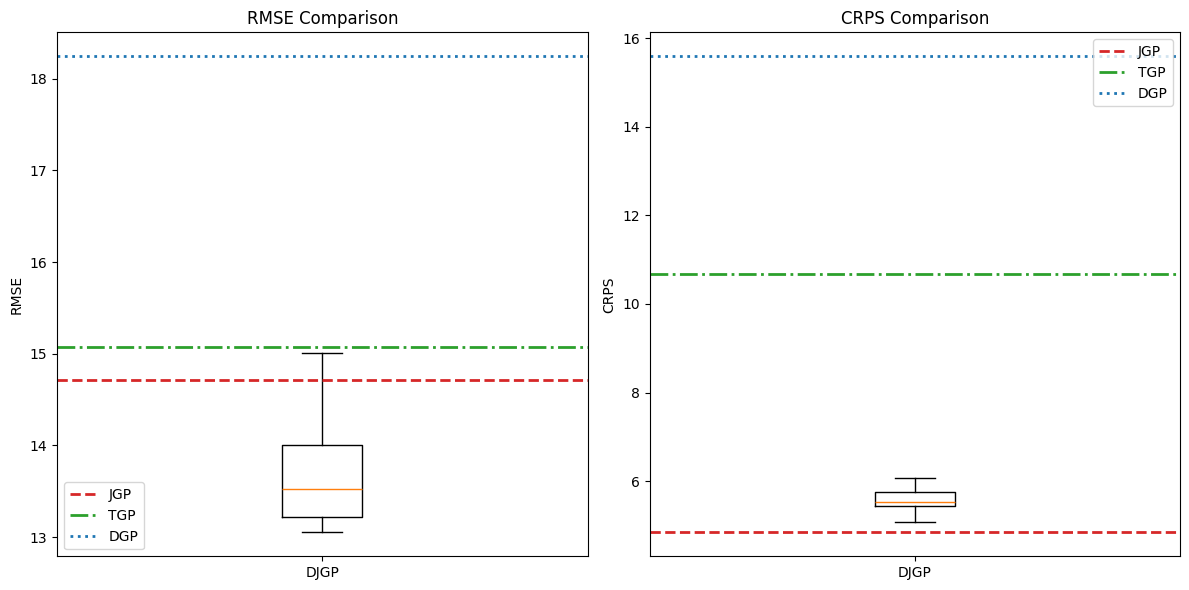

In [20]:
import matplotlib.pyplot as plt

# 数据
djgp_rmse = [13.2899, 13.0512, 13.2085, 13.2311, 13.5284, 15.0108, 14.6295, 13.7968, 14.1178, 13.8927, 13.0948]
djgp_crps = [5.5383, 5.0765, 5.3965, 5.3854, 5.6447, 6.0607, 5.8466, 5.5386, 5.8746, 5.6423, 5.5056]

# 其它方法的单值
jgp_rmse = 14.709
jgp_crps = 4.8425

tgp_rmse = 15.0792
tgp_crps = 10.6852

dgp_rmse = 18.24733543
dgp_crps = 15.59500027

# 颜色设置
colors = {
    'JGP': 'tab:red',
    'TGP': 'tab:green',
    'DGP': 'tab:blue'
}

# 创建子图
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 左图：RMSE 箱线图 + 横线
axes[0].boxplot(djgp_rmse)
axes[0].axhline(jgp_rmse, color=colors['JGP'], linestyle='--', linewidth=2, label='JGP')
axes[0].axhline(tgp_rmse, color=colors['TGP'], linestyle='-.', linewidth=2, label='TGP')
axes[0].axhline(dgp_rmse, color=colors['DGP'], linestyle=':', linewidth=2, label='DGP')
axes[0].set_title('RMSE Comparison')
axes[0].set_ylabel('RMSE')
axes[0].set_xticks([1])
axes[0].set_xticklabels(['DJGP'])
axes[0].legend()

# 右图：CRPS 箱线图 + 横线
axes[1].boxplot(djgp_crps)
axes[1].axhline(jgp_crps, color=colors['JGP'], linestyle='--', linewidth=2, label='JGP')
axes[1].axhline(tgp_crps, color=colors['TGP'], linestyle='-.', linewidth=2, label='TGP')
axes[1].axhline(dgp_crps, color=colors['DGP'], linestyle=':', linewidth=2, label='DGP')
axes[1].set_title('CRPS Comparison')
axes[1].set_ylabel('CRPS')
axes[1].set_xticks([1])
axes[1].set_xticklabels(['DJGP'])
axes[1].legend()

plt.tight_layout()
plt.show()


Gaussian process regression could be useful for surrogate modeling with uncertainty quantification and has good performance with few data. Jump gaussian process could be used to estimate an unknown piecewise continuous regression function, which is a local GP estimate of an unknown regression function at each test location while partitions the local data into pieces by a local data partitioning function. However, when it comes to higher dimensional inputs, the neighborhood could be sparse and the partitioning function could also be poor. Thus,  We developed a method called Locally mahalanobis Jump gaussian process (LMJGP) modeling to further estimate an unknown piecewise continuous regression function with high dimensional inputs. Based on deep mahalanobis gaussian process, we use global information for the dimensionality reduction. But for one neighborhood, we use the projection matrix of the test points as the approximation of the neighborhood dimensionality reduction, thus it’s still a local GP but utilize global information. Our experiments show promising results.

Gaussian process regression (GPR) is a powerful surrogate‐modeling tool that delivers principled uncertainty quantification and often excels in data‐scarce regimes. The Jump Gaussian Process (JGP) extends GPR to piecewise‐continuous targets by partitioning each local neighborhood into subregions and fitting independent GPs on those pieces. Yet in high‐dimensional settings, neighborhoods become sparse and simple partitioning rules break down, degrading both accuracy and confidence estimates.
To address this, we introduce the Locally Mahalanobis Jump Gaussian Process (LMJGP)—a model that learns both a global embedding and its local “jump” GP partitions via variational inference. Concretely, we posit a deep Mahalanobis GP that projects every input into a low-dimensional latent space; simultaneously, we embed a JGP likelihood term so that the projection and the jumpGP parameters are optimized jointly. LMJGP marries the strengths of a global dimension-reduction step—learned via a deep Mahalanobis GP—to identify a low-dimensional embedding, with a local JGP structure around each test point. Concretely, we first train a global projection that captures the most informative subspace of the inputs. Then, for each test location, we use its projection matrix to define a reduced-dimensional neighborhood, on which we perform the usual “jump” partitioning and local GP fitting. Noticeably, we use one projection matrix in one neighborhood, which means that we approximate the learned non-linear embedding by its locally linear map at each test point.. This hybrid strategy preserves the adaptability of local GPs while leveraging global structure to combat sparsity in high dimensions.
Our experiments show promising results compared with JGP, standard GPR with SIR and deep gaussian process.


In [1]:
import pandas as pd
import numpy as np

# 1. 下载原始文本
url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(url, sep="\s+", skiprows=22, header=None)

# 2. 数据在奇偶行中交错存储，需要拼接
#    前半部分是特征，后半部分第 2 列开始是 target
data = np.hstack([ raw_df.values[::2, :],   # 奇数行所有列
                   raw_df.values[1::2, :2] ])  # 偶数行前两列
target = raw_df.values[1::2, 2]              # 偶数行第 3 列

print("X shape:", data.shape)  # 应该是 (506, 13)
print("y shape:", target.shape)


X shape: (506, 13)
y shape: (506,)


In [2]:
import pandas as pd
import numpy as np
import torch

# 3. 随机打乱并切分 80% 训练 / 20% 测试
np.random.seed(0)
indices = np.random.permutation(data.shape[0])
split = int(data.shape[0] * 0.8)

train_idx, test_idx = indices[:split], indices[split:]
X_train_np, X_test_np = data[train_idx], data[test_idx]
y_train_np, y_test_np = target[train_idx], target[test_idx]

# 4. 转为 torch.Tensor
X_train = torch.from_numpy(X_train_np).float()
Y_train = torch.from_numpy(y_train_np).float()
X_test  = torch.from_numpy(X_test_np).float()
Y_test  = torch.from_numpy(y_test_np).float()

# 输出形状验证
print("X_train:", X_train.shape)
print("y_train:", Y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", Y_test.shape)

X_train: torch.Size([404, 13])
y_train: torch.Size([404])
X_test:  torch.Size([102, 13])
y_test:  torch.Size([102])


In [19]:
data = {"X_train": X_train, "Y_train": Y_train, "X_test": X_test, "Y_test": Y_test}
from data_generate import save_dataset
save_dataset(data, args, folder_name="Boston")


'Boston'

: 

In [18]:
from DJGP_test import *
from argparse import Namespace
args = Namespace(
    epochs=100,           # 训练轮数
    num_epochs=300,
    batch_size=1024,
    hidden_dim=2,
    lr=0.01,
    print_freq=10,        # 每多少个 epoch 打印一次信息
    # save_path="./model",  # 模型保存路径（可选）
    Q = 3,
    m1 = 2,
    m2 = 20,
    n = 20,
    num_steps = 500,
    MC_num = 3,
    eval=True,            # 是否评估模型性能
    patience=10,          # 提前停止的耐心轮数
    clip_grad=1.0,        # 梯度裁剪（可选）
    # 如果你的 train_model 用了更多字段，也可以在这里继续加
)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X_train = X_train.float().to(device)
Y_train = Y_train.float().squeeze(-1).to(device)
X_test = X_test.float().to(device)
Y_test = Y_test.float().squeeze(-1).to(device)

N_test, D = X_test.shape
T         = N_test
Q         = args.Q
m1        = args.m1
m2        = args.m2
n         = args.n
num_steps = args.num_steps
MC_num    = args.MC_num

# 4. Build neighborhoods (on CPU) then move to GPU
neighborhoods = find_neighborhoods(
    X_test.cpu(), X_train.cpu(), Y_train.cpu(), M=n
)
regions = []
start_time = time.time()
for i in range(T):
    X_nb = neighborhoods[i]['X_neighbors'].to(device)  # (n, D)
    y_nb = neighborhoods[i]['y_neighbors'].to(device)  # (n,)
    regions.append({
        'X': X_nb,
        'y': y_nb,
        'C': torch.randn(m1, Q, device=device)       # random init
    })

# 5. Initialize V_params on GPU
V_params = {
    'mu_V':    torch.randn(m2, Q, D, device=device, requires_grad=True),
    'sigma_V': torch.rand( m2, Q, D, device=device, requires_grad=True),
}

# 6. Initialize u_params on GPU
u_params = []
for _ in range(T):
    u_params.append({
        'U_logit':    torch.zeros(1, device=device, requires_grad=True),
        'mu_u':       torch.randn(m1, device=device, requires_grad=True),
        'Sigma_u':    torch.eye(m1, device=device, requires_grad=True),
        'sigma_noise':torch.tensor(0.5, device=device, requires_grad=True),
        'sigma_k':torch.tensor(0.5, device=device, requires_grad=True),
        'omega':      torch.randn(Q+1, device=device, requires_grad=True),
    })

# 7. Initialize hyperparams on GPU
X_train_mean = X_train.mean(dim=0)
X_train_std  = X_train.std(dim=0)
Z = X_train_mean + torch.randn(m2, D, device=device) * X_train_std

hyperparams = {
    'Z':            Z,                      # (m2, D)
    'X_test':       X_test,                 # (T, D)
    'lengthscales':torch.rand(Q, device=device, requires_grad=True),
    'var_w':        torch.tensor(1.0, device=device, requires_grad=True),
}

print("Everything set!")

# 8. Compute ELBO, backprop, train, predict
# L = compute_ELBO(regions, V_params, u_params, hyperparams)
# print("ELBO L =", L.item())
# L.backward()
# print("Gradients OK")

V_params, u_params, hyperparams = train_vi(
    regions=regions,
    V_params=V_params,
    u_params=u_params,
    hyperparams=hyperparams,
    lr=args.lr,
    num_steps=num_steps,
    log_interval=50
)
print("train OK")

mu_pred, var_pred = predict_vi(
    regions, V_params, hyperparams, M=MC_num
)
print("Prediction OK")
# print("mu_pred:", mu_pred.shape)
# print("var_pred:", var_pred.shape)

# 9. Compute metrics & runtime
run_time = time.time() - start_time
# rmse, q25, q50, q75 = compute_metrics(mu_pred, var_pred, Y_test)
# print("Results [rmse, 25%, 50%, 75%, runtime]:")
# print([rmse, q25, q50, q75, run_time])

# return [rmse, q25, q50, q75, run_time]
sigmas = torch.sqrt(var_pred)
rmse, mean_crps = compute_metrics(mu_pred, sigmas, Y_test)
print(f"Results [rmse, mean crps, runtime]:{[rmse, mean_crps]}")

Everything set!
[Step 1/500] ELBO=-7745.0896, LR=1.00e-02
[Step 50/500] ELBO=-3412.8626, LR=1.00e-02
[Step 100/500] ELBO=-889.3250, LR=1.00e-02
[Step 150/500] ELBO=-561.9528, LR=1.00e-02
[Step 200/500] ELBO=-302.2832, LR=1.00e-02
[Step 250/500] ELBO=-127.3050, LR=1.00e-02
[Step 300/500] ELBO=-57.3284, LR=1.00e-02
[Step 350/500] ELBO=-20.2436, LR=1.00e-02
[Step 400/500] ELBO=-5.9729, LR=1.00e-02
[Step 450/500] ELBO=-2.8925, LR=1.00e-02
[Step 500/500] ELBO=-2.5050, LR=1.00e-02
train OK


102it [00:12,  8.16it/s]
102it [00:13,  7.53it/s]
102it [00:15,  6.60it/s]

Prediction OK
Results [rmse, mean crps, runtime]:[tensor(6.3670, device='cuda:0'), tensor(2.9555, device='cuda:0')]


In [6]:
from DeepGP_test import *

from argparse import Namespace

args = Namespace(
    epochs=100,           # 训练轮数
    num_epochs=300,
    batch_size=64,
    hidden_dim=5,
    lr=0.01,
    print_freq=10,        # 每多少个 epoch 打印一次信息
    # save_path="./model",  # 模型保存路径（可选）
    eval=True,            # 是否评估模型性能
    patience=30,          # 提前停止的耐心轮数
    clip_grad=1.0,        # 梯度裁剪（可选）
    # 如果你的 train_model 用了更多字段，也可以在这里继续加
)

# X_train = X_train.float().to(device)
# Y_train = Y_train.float().squeeze(-1).to(device)
# X_test = X_test.float().to(device)
# Y_test = Y_test.float().squeeze(-1).to(device)

# 创建数据加载器
batch_size, hidden_dim, lr = 128, 2, 0.01
train_dataset = TensorDataset(X_train, Y_train)
test_dataset = TensorDataset(X_test, Y_test)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# 初始化模型
model = DeepGP(X_train.shape, hidden_dim).to(device)

# 初始化优化器和损失函数
optimizer = torch.optim.Adam([{'params': model.parameters()}], lr=lr)
mll = DeepApproximateMLL(VariationalELBO(model.likelihood, model, X_train.shape[-2]))

# 训练模型
final_metrics = train_model(model, train_loader, test_loader, optimizer, mll, args)
final_metrics

Epoch: 100%|██████████| 300/300 [00:39<00:00,  7.63it/s, crps=14.9504, loss=39.1031, rmse=18.9561] 


{'rmse': 18.9560546875,
 'crps': 14.950444221496582,
 'run_time': 39.29376149177551}

In [7]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

(torch.Size([404, 13]),
 torch.Size([404]),
 torch.Size([102, 13]),
 torch.Size([102]))

In [14]:
device = 'cpu'
x_train = torch.tensor(X_train, dtype=torch.float32).to(device)
x_test = torch.tensor(X_test, dtype=torch.float32).to(device)   
y_train = torch.tensor(Y_train, dtype=torch.float32).to(device)
y_test = torch.tensor(Y_test, dtype=torch.float32).to(device)

C:\Users\23740\AppData\Local\Temp\ipykernel_38288\2626648191.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train = torch.tensor(X_train, dtype=torch.float32).to(device)
C:\Users\23740\AppData\Local\Temp\ipykernel_38288\2626648191.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_test = torch.tensor(X_test, dtype=torch.float32).to(device)
C:\Users\23740\AppData\Local\Temp\ipykernel_38288\2626648191.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(Y_train, dtype=torch.float32).to(device)
C:\Users\23740\

In [15]:
from JumpGP_test import *

M = 20
neighborhoods = find_neighborhoods(x_test, x_train, y_train, M)
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = 'cpu'
result = evaluate_jumpgp(x_test, y_test, neighborhoods, device)
result

100%|██████████| 102/102 [00:39<00:00,  2.60it/s]


[tensor(5.4636), tensor(2.8586), 39.30130076408386]

In [11]:
from scipy.io import loadmat

# 加载 .mat 文件
data = loadmat('result_OHT_4d')

# 查看文件中有哪些变量
print(data.keys())

X_train = data['xc']
Y_train = data['yc']
X_test = data['xt']
Y_test = data['yt']

dict_keys(['__header__', '__version__', '__globals__', 'mse', 'nlpd', 'pred', 'pred_var', 'rmse', 'x_AL', 'xc', 'xt', 'y_AL', 'yc', 'yt'])


In [12]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((6280, 4), (6280, 1), (2069, 4), (2069, 1))

In [13]:
from sklearn.cluster import KMeans
import numpy as np

def select_representative_points(X_train, Y_train, M, random_state=0):
    """
    使用 KMeans 从 X_train 中选择最具代表性的 M 个点
    
    参数:
        X_train: ndarray, shape (N, d) 输入特征
        Y_train: ndarray, shape (N, 1) 目标变量
        M: int，代表性点的数量
        random_state: int，用于 KMeans 的随机种子

    返回:
        X_selected: ndarray, shape (M, d) 被选中的代表点
        Y_selected: ndarray, shape (M, 1) 对应的标签
        selected_indices: list, 在 X_train 中选中点的索引
    """
    kmeans = KMeans(n_clusters=M, random_state=random_state)
    kmeans.fit(X_train)
    
    # 找每个聚类中心最近的点
    centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    
    selected_indices = []
    for i in range(M):
        cluster_points_idx = np.where(labels == i)[0]
        cluster_points = X_train[cluster_points_idx]
        dists = np.linalg.norm(cluster_points - centers[i], axis=1)
        closest_idx_in_cluster = cluster_points_idx[np.argmin(dists)]
        selected_indices.append(closest_idx_in_cluster)
    
    X_selected = X_train[selected_indices]
    Y_selected = Y_train[selected_indices]
    
    return X_selected, Y_selected, selected_indices


In [15]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "8"  # 假设你想设置为 8 核


X_selected, Y_selected, indices = select_representative_points(X_train, Y_train, M=100)
print("代表性点索引:", indices)


代表性点索引: [np.int64(6026), np.int64(3782), np.int64(5522), np.int64(1771), np.int64(6089), np.int64(3792), np.int64(770), np.int64(2256), np.int64(1790), np.int64(1343), np.int64(4531), np.int64(196), np.int64(5397), np.int64(257), np.int64(5927), np.int64(678), np.int64(4865), np.int64(4498), np.int64(4288), np.int64(4282), np.int64(2258), np.int64(1434), np.int64(3598), np.int64(4305), np.int64(2731), np.int64(4429), np.int64(5845), np.int64(4388), np.int64(3580), np.int64(2503), np.int64(3947), np.int64(1951), np.int64(5040), np.int64(2180), np.int64(3620), np.int64(4400), np.int64(3990), np.int64(3111), np.int64(5545), np.int64(5116), np.int64(5690), np.int64(455), np.int64(5862), np.int64(763), np.int64(4103), np.int64(1594), np.int64(2029), np.int64(202), np.int64(4818), np.int64(3810), np.int64(2067), np.int64(220), np.int64(60), np.int64(4041), np.int64(2333), np.int64(3432), np.int64(496), np.int64(1367), np.int64(1680), np.int64(2147), np.int64(4877), np.int64(1258), np.int64(3

In [17]:
len(indices)

100

In [40]:
import pickle

# 保存
# with open("res_OHTDataset.pkl", "wb") as f:
#     pickle.dump(results, f)

# # 加载
with open("res_OHTDataset.pkl", "rb") as f:
    loaded_list = pickle.load(f)

with open("OHTDataset\\fulltest\\res_OHTDataset.pkl", "rb") as f:
    loaded_list1 = pickle.load(f)

for i in range(len(loaded_list1)):
    x = loaded_list1[i]
    x0 = loaded_list[i]
    for key,value in x.items():
        if key not in x0:
            x0[key] = value

loaded_list

[{'M_selected': 100,
  'LMJGP': [tensor(16.0677, device='cuda:0', dtype=torch.float64),
   tensor(8.1314, device='cuda:0', dtype=torch.float64),
   678.4410865306854],
  'res_jgp': [[tensor(12.9363), tensor(4.3436), 197.49625253677368]],
  'res_dgp': {'rmse': 11.446676254272461,
   'crps': 4.6670355796813965,
   'run_time': 143.79290795326233}},
 {'M_selected': 200,
  'LMJGP': [tensor(16.0676, device='cuda:0', dtype=torch.float64),
   tensor(8.2163, device='cuda:0', dtype=torch.float64),
   827.2875220775604],
  'res_jgp': [[tensor(12.0818), tensor(3.7615), 259.3874249458313]],
  'res_dgp': {'rmse': 10.486211776733398,
   'crps': 4.204740524291992,
   'run_time': 118.04408693313599}},
 {'M_selected': 500,
  'LMJGP': [tensor(17.3587, device='cuda:0', dtype=torch.float64),
   tensor(8.8931, device='cuda:0', dtype=torch.float64),
   610.8868947029114],
  'res_jgp': [[tensor(11.3541), tensor(3.3922), 240.43530130386353]],
  'res_dgp': {'rmse': 9.244988441467285,
   'crps': 3.24403619766235

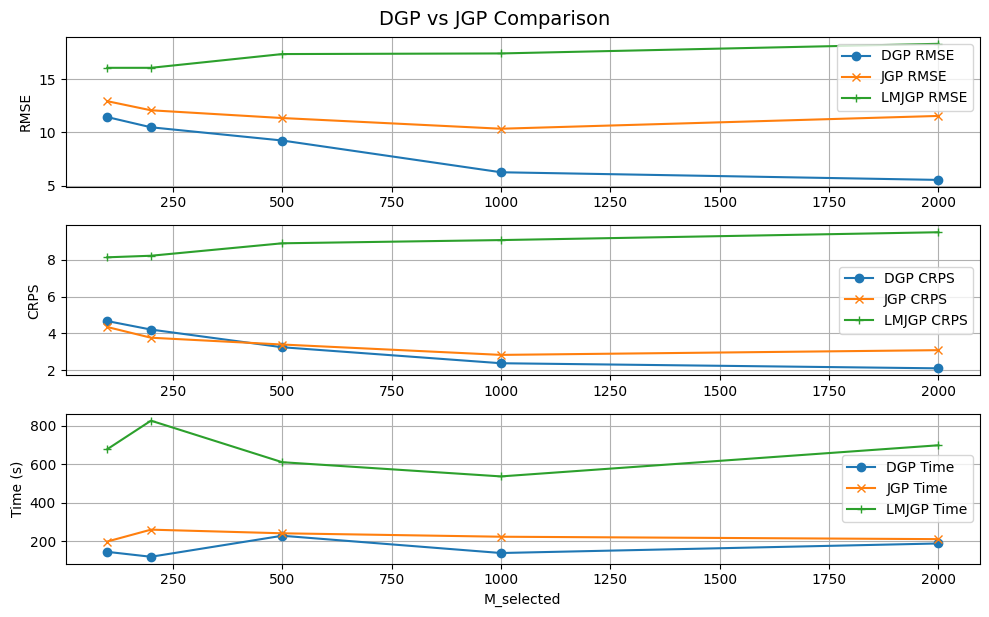

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# 你的数据
data = loaded_list

M_values = [entry['M_selected'] for entry in data]

# DGP 指标
rmse_dgp = [entry['res_dgp']['rmse'] for entry in data]
crps_dgp = [entry['res_dgp']['crps'] for entry in data]
time_dgp = [entry['res_dgp']['run_time'] for entry in data]

# JGP 指标（只提取那个唯一的结果）
def to_float(x):
    return x.item() if hasattr(x, 'item') else x

rmse_jgp = [to_float(entry['res_jgp'][0][0]) for entry in data]
crps_jgp = [to_float(entry['res_jgp'][0][1]) for entry in data]
time_jgp = [to_float(entry['res_jgp'][0][2]) for entry in data]

rmse_lmjgp = [to_float(entry['LMJGP'][0]) for entry in data]
crps_lmjgp = [to_float(entry['LMJGP'][1]) for entry in data]
time_lmjgp = [to_float(entry['LMJGP'][2]) for entry in data]

# ----------- 绘图 ------------------

plt.figure(figsize=(10, 6))

# 1. RMSE
plt.subplot(3, 1, 1)
plt.plot(M_values, rmse_dgp, label="DGP RMSE", marker='o')
plt.plot(M_values, rmse_jgp, label="JGP RMSE", marker='x')
plt.plot(M_values, rmse_lmjgp, label="LMJGP RMSE", marker='+')
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)

# 2. CRPS
plt.subplot(3, 1, 2)
plt.plot(M_values, crps_dgp, label="DGP CRPS", marker='o')
plt.plot(M_values, crps_jgp, label="JGP CRPS", marker='x')
plt.plot(M_values, crps_lmjgp, label="LMJGP CRPS", marker='+')
plt.ylabel("CRPS")
plt.legend()
plt.grid(True)

# 3. Run Time
plt.subplot(3, 1, 3)
plt.plot(M_values, time_dgp, label="DGP Time", marker='o')
plt.plot(M_values, time_jgp, label="JGP Time", marker='x')  
plt.plot(M_values, time_lmjgp, label="LMJGP Time", marker='+')
plt.xlabel("M_selected")
plt.ylabel("Time (s)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.suptitle("DGP vs JGP Comparison", fontsize=14, y=1.02)
plt.show()


In [34]:
import matplotlib.pyplot as plt
import numpy as np

# 你的数据
data = loaded_list

M_values = [entry['M_selected'] for entry in data]

# DGP 指标
rmse_dgp = [entry['res_dgp']['rmse'] for entry in data]
crps_dgp = [entry['res_dgp']['crps'] for entry in data]
time_dgp = [entry['res_dgp']['run_time'] for entry in data]

# JGP - 提取所有阶段数据
def to_float(x):
    return x.item() if hasattr(x, 'item') else x

jgp_rmse_all = [[] for _ in range(4)]
jgp_crps_all = [[] for _ in range(4)]
jgp_time_all = [[] for _ in range(4)]

for entry in data:
    for i, res in enumerate(entry['res_jgp']):
        jgp_rmse_all[i].append(to_float(res[0]))
        jgp_crps_all[i].append(to_float(res[1]))
        jgp_time_all[i].append(to_float(res[2]))

# 计算每个 M 下，JGP 的最小 RMSE/CRPS/Time（按列取最小）
min_rmse_jgp = np.min(jgp_rmse_all, axis=0)
min_crps_jgp = np.min(jgp_crps_all, axis=0)
min_time_jgp = np.min(jgp_time_all, axis=0)

# ----------- 绘图 ------------------

plt.figure(figsize=(10, 6))

# 1. RMSE
plt.subplot(3, 1, 1)
plt.plot(M_values, rmse_dgp, label="DGP RMSE", marker='o')
plt.plot(M_values, min_rmse_jgp, label="JGP RMSE (min over stages)", marker='x')
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)

# 2. CRPS
plt.subplot(3, 1, 2)
plt.plot(M_values, crps_dgp, label="DGP CRPS", marker='o')
plt.plot(M_values, min_crps_jgp, label="JGP CRPS (min over stages)", marker='x')
plt.ylabel("CRPS")
plt.legend()
plt.grid(True)

# 3. Run Time
plt.subplot(3, 1, 3)
plt.plot(M_values, time_dgp, label="DGP Time", marker='o')
plt.plot(M_values, min_time_jgp, label="JGP Time (min over stages)", marker='x')
plt.xlabel("M_selected")
plt.ylabel("Time (s)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.suptitle("DGP vs JGP (min over 4 stages)", fontsize=14, y=1.02)
plt.show()


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

In [27]:
# 假设 data 是你已有的结果列表
data = loaded_list
M_list = [20, 30, 40, 50]

def to_float(x):
    return x.item() if hasattr(x, 'item') else x

best_jgp_stage_indices = []

for entry in data:
    jgp_stages = entry['res_jgp']
    rmse_values = [to_float(stage[0]) for stage in jgp_stages]
    best_idx = int(np.argmin(rmse_values))  # 最小 RMSE 的阶段索引
    best_jgp_stage_indices.append(best_idx)

# 打印结果
for m_val, idx in zip([entry['M_selected'] for entry in data], best_jgp_stage_indices):
    print(f"M_selected = {m_val}: Best JGP Stage Neighborhoods = {M_list[idx]}")


M_selected = 100: Best JGP Stage Neighborhoods = 50
M_selected = 200: Best JGP Stage Neighborhoods = 40
M_selected = 500: Best JGP Stage Neighborhoods = 50
M_selected = 1000: Best JGP Stage Neighborhoods = 20
M_selected = 2000: Best JGP Stage Neighborhoods = 20
M_selected = 5000: Best JGP Stage Neighborhoods = 50


In [31]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "8"

from scipy.io import loadmat
import torch

# 加载 .mat 文件
data = loadmat('OHTDataset.mat')

# 查看文件中有哪些变量
print(data.keys())

X_train = data['x']
Y_train = data['y']
X_test = data['xt']
Y_test = data['yt']

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

x_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(Y_test, dtype=torch.float32).squeeze(-1)
x_test = x_test.float().to(device)
y_test = y_test.float().squeeze(-1).to(device)

x_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(Y_train, dtype=torch.float32).squeeze(-1)

x_train = x_train.float().to(device)
y_train = y_train.float().squeeze(-1).to(device)


from JumpGP_test import *
from DeepGP_test import *
from argparse import Namespace


args = Namespace(
    epochs=100,           # 训练轮数
    num_epochs=300,
    batch_size=1024,
    hidden_dim=2,
    lr=0.01,
    print_freq=10,        # 每多少个 epoch 打印一次信息
    # save_path="./model",  # 模型保存路径（可选）
    eval=True,            # 是否评估模型性能
    patience=30,          # 提前停止的耐心轮数
    clip_grad=1.0,        # 梯度裁剪（可选）
    # 如果你的 train_model 用了更多字段，也可以在这里继续加
)


# 创建数据加载器
batch_size, hidden_dim, lr = 128, 2, 0.01
train_dataset = TensorDataset(x_train, y_train)
test_dataset = TensorDataset(x_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# 初始化模型
model = DeepGP(x_train.shape, hidden_dim).to(device)

# 初始化优化器和损失函数
optimizer = torch.optim.Adam([{'params': model.parameters()}], lr=lr)
mll = DeepApproximateMLL(VariationalELBO(model.likelihood, model, x_train.shape[-2]))

# 训练模型
final_metrics = train_model(model, train_loader, test_loader, optimizer, mll, args)
print(final_metrics)

dict_keys(['__header__', '__version__', '__globals__', 'x', 'xt', 'y', 'yt'])


Epoch:   0%|          | 0/300 [00:00<?, ?it/s]

Epoch:  80%|████████  | 240/300 [01:29<00:22,  2.69it/s, crps=16.8151, loss=286.3597, rmse=20.4224] 


Early stopping triggered after 241 epochs
{'rmse': 20.422412872314453, 'crps': 16.815143585205078, 'run_time': 89.3551857471466}


In [37]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "8"

from scipy.io import loadmat
import torch

# 加载 .mat 文件
data = loadmat('OHTDataset.mat')

# 查看文件中有哪些变量
print(data.keys())

X_train = data['x']
Y_train = data['y']
X_test = data['xt']
Y_test = data['yt']

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

x_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(Y_test, dtype=torch.float32).squeeze(-1)
x_test = x_test.float().to(device)
y_test = y_test.float().squeeze(-1).to(device)

x_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(Y_train, dtype=torch.float32).squeeze(-1)

x_train = x_train.float().to(device)
y_train = y_train.float().squeeze(-1).to(device)


from JumpGP_test import *

args = Namespace(
    M = 20,
    device = device,
    use_sir = True,
    use_cv = False,
    sir_H = 4,
    sir_K = 3
)
x_train, x_test = apply_sir_reduction(x_train, y_train, x_test, args)
neighborhoods = find_neighborhoods(x_test, x_train, y_train, args.M)
result = evaluate_jumpgp(x_test, y_test, neighborhoods, device)
print(result)

dict_keys(['__header__', '__version__', '__globals__', 'x', 'xt', 'y', 'yt'])


100%|██████████| 2069/2069 [04:00<00:00,  8.59it/s]


[tensor(25.4416), tensor(8.4367), 240.98114657402039]


In [38]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "8"

from scipy.io import loadmat
import torch

# 加载 .mat 文件
data = loadmat('OHTDataset.mat')

# 查看文件中有哪些变量
print(data.keys())

X_train = data['x']
Y_train = data['y']
X_test = data['xt']
Y_test = data['yt']

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

x_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(Y_test, dtype=torch.float32).squeeze(-1)
x_test = x_test.float().to(device)
y_test = y_test.float().squeeze(-1).to(device)

x_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(Y_train, dtype=torch.float32).squeeze(-1)

x_train = x_train.float().to(device)
y_train = y_train.float().squeeze(-1).to(device)


from JumpGP_test import *

args = Namespace(
    M = 20,
    device = device,
    use_sir = True,
    use_cv = False,
    sir_H = 4,
    sir_K = 2
)
x_train, x_test = apply_sir_reduction(x_train, y_train, x_test, args)
neighborhoods = find_neighborhoods(x_test, x_train, y_train, args.M)
result = evaluate_jumpgp(x_test, y_test, neighborhoods, device)
print(result)

dict_keys(['__header__', '__version__', '__globals__', 'x', 'xt', 'y', 'yt'])


100%|██████████| 2069/2069 [02:22<00:00, 14.57it/s]

[tensor(17.1635), tensor(6.9687), 142.0180103778839]


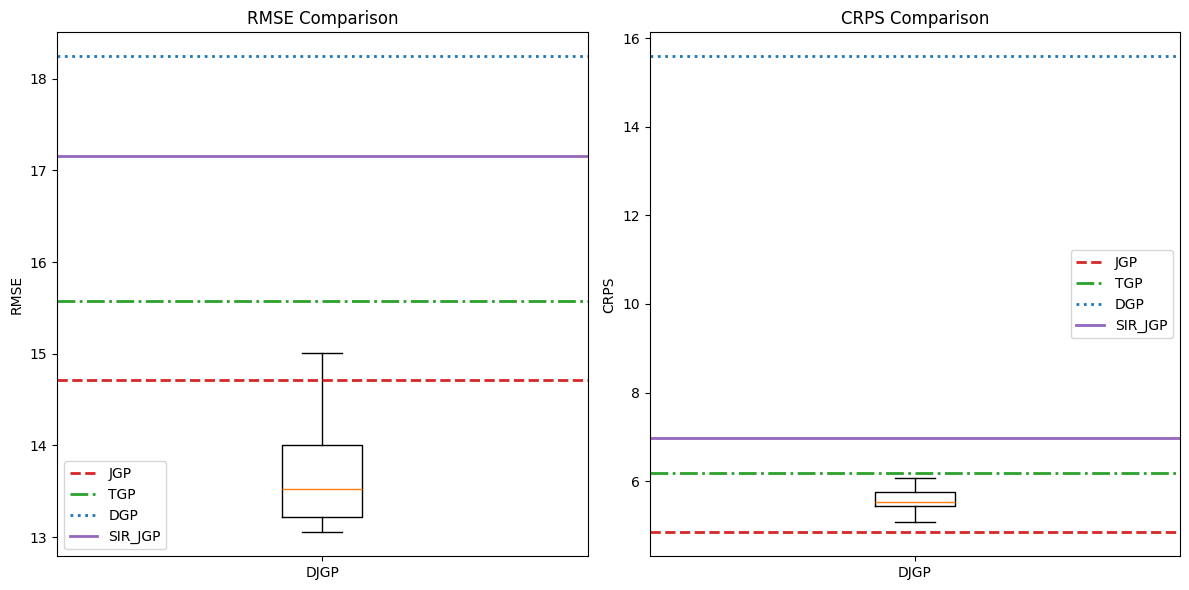

In [1]:
import matplotlib.pyplot as plt

# 最新 DJGP 数据（11组）
djgp_rmse = [13.2899, 13.0512, 13.2085, 13.2311, 13.5284, 15.0108, 14.6295, 13.7968, 14.1178, 13.8927, 13.0948]
djgp_crps = [5.5383, 5.0765, 5.3965, 5.3854, 5.6447, 6.0607, 5.8466, 5.5386, 5.8746, 5.6423, 5.5056]

# 其它方法（从图表中读取）
jgp_rmse = 14.709
jgp_crps = 4.8425

tgp_rmse = 15.57313
tgp_crps = 6.186506

dgp_rmse = 18.24733543
dgp_crps = 15.59500027

sirjgp_rmse = 17.1635
sirjgp_crps = 6.9687

# 添加颜色
colors = {
    'JGP': 'tab:red',
    'TGP': 'tab:green',
    'DGP': 'tab:blue',
    'SIR_JGP': 'tab:purple'
}

# 创建子图
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# --- RMSE ---
axes[0].boxplot(djgp_rmse, positions=[1])
axes[0].axhline(jgp_rmse, color=colors['JGP'], linestyle='--', linewidth=2, label='JGP')
axes[0].axhline(tgp_rmse, color=colors['TGP'], linestyle='-.', linewidth=2, label='TGP')
axes[0].axhline(dgp_rmse, color=colors['DGP'], linestyle=':', linewidth=2, label='DGP')
axes[0].axhline(sirjgp_rmse, color=colors['SIR_JGP'], linestyle='-', linewidth=2, label='SIR_JGP')
axes[0].set_title('RMSE Comparison')
axes[0].set_ylabel('RMSE')
axes[0].set_xticks([1])
axes[0].set_xticklabels(['DJGP'])
axes[0].legend()

# --- CRPS ---
axes[1].boxplot(djgp_crps, positions=[1])
axes[1].axhline(jgp_crps, color=colors['JGP'], linestyle='--', linewidth=2, label='JGP')
axes[1].axhline(tgp_crps, color=colors['TGP'], linestyle='-.', linewidth=2, label='TGP')
axes[1].axhline(dgp_crps, color=colors['DGP'], linestyle=':', linewidth=2, label='DGP')
axes[1].axhline(sirjgp_crps, color=colors['SIR_JGP'], linestyle='-', linewidth=2, label='SIR_JGP')
axes[1].set_title('CRPS Comparison')
axes[1].set_ylabel('CRPS')
axes[1].set_xticks([1])
axes[1].set_xticklabels(['DJGP'])
axes[1].legend()

plt.tight_layout()
plt.show()
